<a href="https://colab.research.google.com/github/rahmaashraf310/Heart_Disease_Project/blob/main/notebooks/04_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train shape: (242, 13) Test shape: (61, 13)

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61


Decision Tree Report:
              precision    recall  f1-score   support

           0       0.77      0.70      0.73        33
           1       0.68      0.75      0.71        28

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61


Random Forest Report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro 

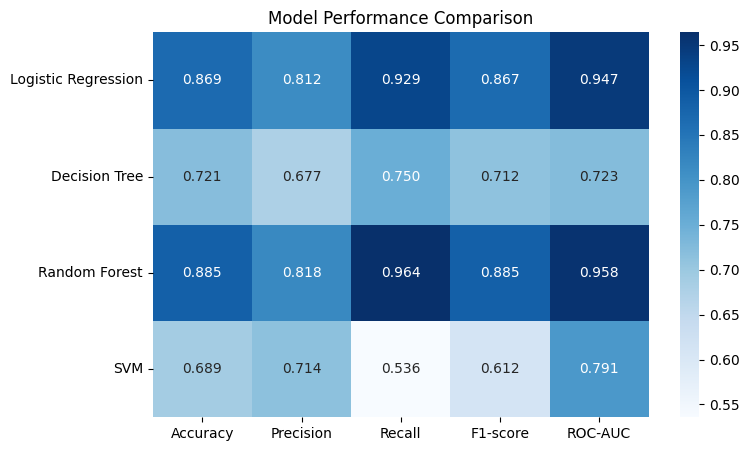

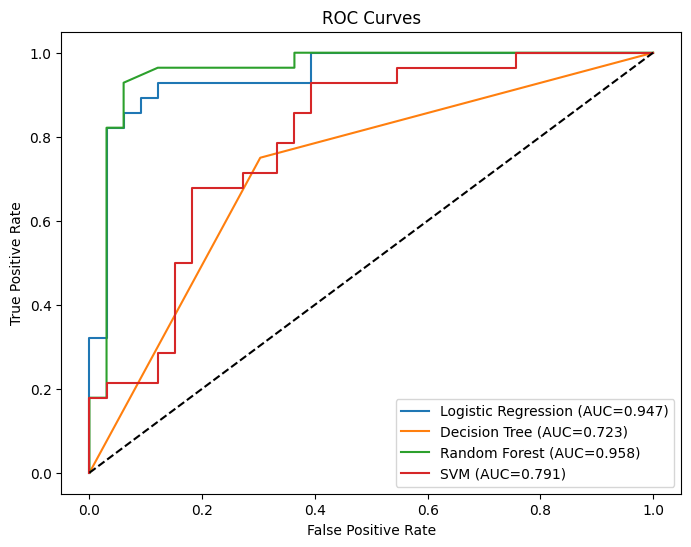


Interpretation of Results:
- Random Forest achieved the best overall performance (highest Accuracy, Recall, F1, and ROC-AUC).
- Logistic Regression also performed strongly, close to Random Forest.
- Decision Tree performed worse, likely due to overfitting.
- SVM struggled, especially on Recall (it missed many positive cases).
- In medical contexts, Recall and ROC-AUC are most important.
  → Random Forest is the preferred model because it detects almost all patients with disease (Recall ~0.96).



In [ ]:
# =============================================
# Heart Disease Project — Step 2.4 Supervised Learning
# =============================================

# 1. Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, classification_report
)

# ---------------------------------------------
# 2. Load reduced dataset
# ---------------------------------------------
df = pd.read_csv("results/selected_features.csv")

X = df.drop("target", axis=1)
y = (df["target"] > 0).astype(int)


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# ---------------------------------------------
# 3. Initialize models
# ---------------------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="liblinear"),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

results = {}

# ---------------------------------------------
# 4. Train and evaluate
# ---------------------------------------------
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba),
    }

    print(f"\n{name} Report:")
    print(classification_report(y_test, y_pred))

# ---------------------------------------------
# 5. Compare metrics
# ---------------------------------------------
results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n", results_df)

plt.figure(figsize=(8, 5))
sns.heatmap(results_df, annot=True, fmt=".3f", cmap="Blues")
plt.title("Model Performance Comparison")
plt.show()

# ---------------------------------------------
# 6. ROC Curves
# ---------------------------------------------
plt.figure(figsize=(8, 6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_proba):.3f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

# =============================================
# 7. Interpretation
# =============================================

print("""
Interpretation of Results:
- Random Forest achieved the best overall performance (highest Accuracy, Recall, F1, and ROC-AUC).
- Logistic Regression also performed strongly, close to Random Forest.
- Decision Tree performed worse, likely due to overfitting.
- SVM struggled, especially on Recall (it missed many positive cases).
- In medical contexts, Recall and ROC-AUC are most important.
  → Random Forest is the preferred model because it detects almost all patients with disease (Recall ~0.96).
""")
